In [6]:
#python 异常检测分析
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#数据准备
raw_data = np.loadtxt('outlier.txt',delimiter=' ')
train_set = raw_data[:900,:]
test_set = raw_data[:100,:]

In [3]:
#异常数据检测
model_oneclasssvm = OneClassSVM(nu=0.1, kernel='rbf', random_state=0)
model_oneclasssvm.fit(train_set)
pre_test_outliers = model_oneclasssvm.predict(test_set)

In [4]:
#异常结果统计
toal_test_data = np.hstack((test_set, pre_test_outliers.reshape(test_set.shape[0],1)))
#将测试集和检测结果合并
normal_test_data = toal_test_data[toal_test_data[:,-1] == 1]
outlier_test_data = toal_test_data[toal_test_data[:,-1] == -1]
n_test_outliers = outlier_test_data.shape[1]
toal_count_data = toal_test_data.shape[0]
print('{:*^60}'.format('all result data(1 limit 5)'))
print(toal_test_data[:5])

*****************all result data(1 limit 5)*****************
[[ 0.03685295  0.0343899   0.09197858 -0.01026255 -0.00814121 -1.        ]
 [-0.0011522   0.02174971 -0.02040125  0.00986554 -0.03447136  1.        ]
 [-0.01258645  0.04736393  0.01110832 -0.01156876 -0.02334062  1.        ]
 [-0.02837847  0.04398011  0.00126378  0.02313849  0.00542565  1.        ]
 [ 0.02222529  0.00715191 -0.03713534 -0.02938668 -0.09915368 -1.        ]]


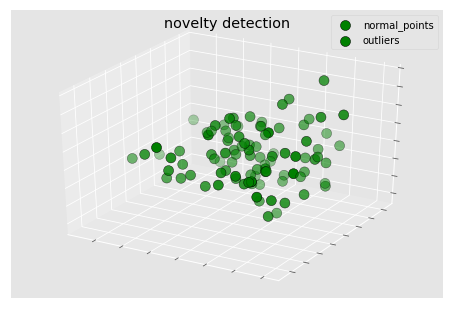

In [9]:
#异常检测结果展示
plt.style.use('ggplot')
fig = plt.figure()
ax = Axes3D(fig)
s1 = ax.scatter(normal_test_data[:,0],normal_test_data[:,1],normal_test_data[:,2],s=100,edgecolors='k',c='g',marker='o')
s2 = ax.scatter(outlier_test_data[:,0],outlier_test_data[:,1],outlier_test_data[:,2],s=100,edgecolors='k',c='g',marker='o')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.legend([s1, s2],['normal_points','outliers'], loc=0)
plt.title('novelty detection')
plt.show()